### Import the libraries

In [35]:
#import the required libearies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


### Import the data

In [47]:
#Import the data 
df = pd.read_csv("Data/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Ensure all the data is numerical

In [49]:
df_ml = df.drop(columns='country')
df_ml

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### K-Means is a distance based method. Therefore, ensure to scale the data

In [50]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_ml_scaled = scalar.fit_transform(df_ml) 
df_ml_scaled.shape
df_ml_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### Find the optimium K value

- In this step we will figure the K value based on the "elbow method" 
- The initialization method is set to k-means++, because of it higher perfromance in comparision to Random. This is the default selection by the algorithm from scikit learn
- The n_init the number of different initialization sets will remain at 10. The best set will be chosen by algorithm
- The maximum iteration will remain unchanged at 300 to ensure convergence 
- The tol value will remain small at 0.0001 to avoid early convergence 
- We will be modifying the data therefore copy_x will stay at the default of True
- For K-means clustering algorithm of choice will keep at the Lloyd's K-Means default

[1050.2145582853304, 831.4244352086874, 700.3229986404374, 628.552222855879, 550.5699592955895, 506.3155774835265, 452.34982807473114, 428.9296881735681, 396.79280680639386, 373.2773792996768, 354.8510316714203, 333.13472611973873, 321.71737677285984, 309.18130033132314, 284.707635837569, 280.18089066524493, 264.52939319686385, 250.29192088014517, 238.41090951702046, 229.078836162526, 220.1576254790011, 214.55112837238323, 207.8281805438543, 195.80858262483594, 187.3470979634946, 186.4328368057372, 172.5829550985553, 173.9991152522214]


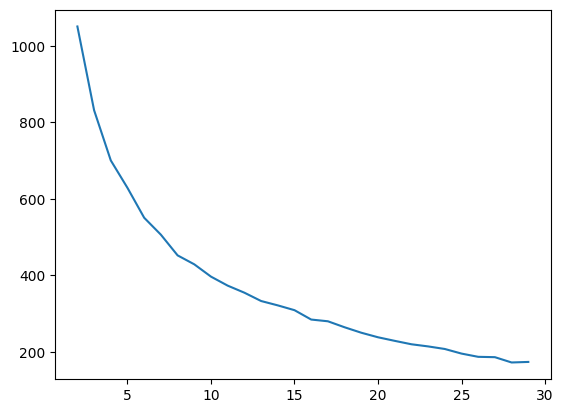

In [51]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings

SSD = []
for k in range(2,30,1): 
    ml_model = KMeans(n_clusters=k)
    ml_model.fit(df_ml_scaled)
    SSD.append(ml_model.inertia_)

print(SSD)
plt.plot(range(2,30,1),SSD) 
plt.show()

- The number of developing countries that would require aid is anywhere between 20-30. 
- Based on the generated plot and following the "Elbow Method" a K of 8-10 seems to satisfy the method. However, the generated results will be the judge of that. 
- We will run K = 9, K = 16 Then, based on domain knowledge an optimum K will be selected


### K-Means Analysis when K = 9

In [283]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
ml_model = KMeans(n_clusters=9, random_state=101)
ml_model.fit(df_ml_scaled) #fit the scaled data
ml_model.predict(df_ml_scaled) #predict the scaled data 
print(len(ml_model.labels_) )


167


In [284]:
#Add the results of the ML model label's to the main dataframe. This will show you which rows have been seperated 
df['Cluster'] = ml_model.labels_
print(df.sort_values(by=['Cluster'], ascending=True).to_string())

                            country  child_mort  exports  health   imports  income  inflation  life_expec  total_fer    gdpp  Cluster
44                          Denmark         4.1   50.500   11.40   43.6000   44000      3.220        79.5       1.87   58000        0
29                           Canada         5.6   29.100   11.30   31.0000   40700      2.870        81.3       1.63   47400        0
74                           Israel         4.6   35.000    7.63   32.9000   29600      1.770        81.4       3.03   30600        0
68                          Iceland         2.6   53.400    9.40   43.3000   38800      5.470        82.0       2.20   41900        0
110                     Netherlands         4.5   72.000   11.90   63.6000   45500      0.848        80.7       1.79   50300        0
111                     New Zealand         6.2   30.300   10.10   28.0000   32300      3.730        80.9       2.17   33700        0
114                          Norway         3.2   39.700    9.

In [285]:
k = 9
df_cluster={}
for x in np.arange(0,k+1):
    df_cluster[x] = df[df['Cluster'] ==x]


In [287]:
df_cluster[0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,0
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,0
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,0
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600,0


In [234]:
df_cluster[1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1


In [215]:
df_cluster[2]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.10,76.5,2.89,4460,2
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.77,73.3,1.69,3220,2
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.80,69.1,1.92,5840,2
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,2
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.78,71.6,3.20,1980,2
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200,2
34,China,15.7,26.300,5.07,22.6000,9530,6.94,74.6,1.59,4560,2
35,Colombia,18.6,15.900,7.59,17.8000,10900,3.86,76.4,2.01,6250,2
45,Dominican Republic,34.4,22.700,6.22,33.3000,11100,5.44,74.6,2.60,5450,2


In [291]:
df_cluster[3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


In [217]:
df_cluster[4]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,4


In [237]:
df_cluster[5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,5
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,5
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,5
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,5
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14600,5
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13100,5
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,5
89,Libya,16.6,65.6,3.88,42.1,29600,14.200,76.1,2.41,12100,5
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.380,73.2,1.50,12000,5
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.270,74.5,2.15,9070,5


In [293]:
df_cluster[6]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300,6
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500,6
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,6


In [239]:
df_cluster[7]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,7
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,7
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,7
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,7
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,7
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,7
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,7
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,7
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,7
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.120,66.1,2.88,786,7


In [240]:
df_cluster[8]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
21,Botswana,52.5,43.6,8.30,51.3,13300,8.92,57.1,2.88,6350,8
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1490,8
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,8
88,Liberia,89.3,19.1,11.80,92.6,700,5.47,60.8,5.02,327,8
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.80,65.4,3.46,2860,8
108,Namibia,56.0,47.8,6.78,60.7,8460,3.56,58.6,3.60,5190,8
126,Rwanda,63.6,12.0,10.50,30.0,1350,2.61,64.6,4.51,563,8
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.81,61.7,4.24,1290,8
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280,8
150,Togo,90.3,40.2,7.65,57.3,1210,1.18,58.7,4.87,488,8


### Conclusions 
-   When K =9, K Means Clustering was able to categories countries that similar to each other into specific categories. 
-   Notably, the world most in need countries were in cluster 1 and the world’s richest countries were in cluster 0
-   The below analysis focused on clusters of 3 or more countries any clusters that contain less than 3 countries were ignored
-   The world most in need countries including Afghanistan, Congo, Niger, etc. Also, happen to be in the same cluster. Cluster K = 1 contained 35  countries. This is the cluster of countries that would require the most help
    - For GDPP, the average is 1446 and the standard deviation is 2839
    - For Children Mortality per 1000. The average is 100 and the standard deviation is 33
-   The world wealthiest cluster that contained more than one country included Qatar, Brunei, and Kuwait. Cluster K = 6 contained 3 oil rich countries
    - For GDPP, the average is 48033  and the standard deviation is 19349. The huge standard deviation difference is because Qatar’s GDPP of 70300
    - For Children Mortality per 1000. The average is 10 and the standard deviation is 0.9
-   The world western world superpowers and most advanced countries including USA, Canada, Germany, etc. happen all to be in same cluster. Cluster K = 0 contained 21 countries
    - For GDPP, the average is 45310 and the standard deviation is 15097
    - For Children Mortality per 1000. The average is 4.3 and the standard deviation is 1.1



---------------------------------------------------------------------------------------------------------------------------------------------

### K-Means Analysis when K = 16

In [296]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
ml_model = KMeans(n_clusters=16, random_state=101)
ml_model.fit(df_ml_scaled) #fit the scaled data
ml_model.predict(df_ml_scaled) #predict the scaled data 
print(len(ml_model.labels_) )

167


In [297]:
#Add the results of the ML model label's to the main dataframe. This will show you which rows have been seperated 
df['Cluster'] = ml_model.labels_
print(df.sort_values(by=['Cluster'], ascending=True).to_string())

                            country  child_mort  exports  health   imports  income  inflation  life_expec  total_fer    gdpp  Cluster
77                            Japan         3.2   15.000    9.49   13.6000   35800     -1.900        82.8       1.39   44500        0
54                           France         4.2   26.800   11.90   28.1000   36900      1.050        81.4       2.03   40600        0
159                   United States         7.3   12.400   17.90   15.8000   49400      1.220        78.7       1.93   48400        0
158                  United Kingdom         5.2   28.200    9.64   30.8000   36200      1.570        80.3       1.92   38900        0
29                           Canada         5.6   29.100   11.30   31.0000   40700      2.870        81.3       1.63   47400        0
58                          Germany         4.2   42.300   11.60   37.1000   40400      0.758        80.1       1.39   41800        0
7                         Australia         4.8   19.800    8.

In [298]:
k = 16
df_cluster={}
for x in np.arange(0,k+1):
    df_cluster[x] = df[df['Cluster'] ==x]

In [299]:
df_cluster[0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,0
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,0
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600,0
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800,0
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500,0
111,New Zealand,6.2,30.3,10.10,28.0,32300,3.730,80.9,2.17,33700,0


In [300]:
df_cluster[1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,1
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
137,South Africa,53.7,28.60,8.94,27.4,12000,6.35,54.3,2.59,7280,1
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1
155,Uganda,81.0,17.10,9.01,28.6,1540,10.60,56.8,6.15,595,1


In [301]:
df_cluster[2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300,2
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500,2
89,Libya,16.6,65.6,3.88,42.1,29600,14.20,76.1,2.41,12100,2
115,Oman,11.7,65.7,2.77,41.2,45300,15.60,76.1,2.90,19300,2
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.20,75.1,2.96,19300,2
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000,2


In [302]:
df_cluster[3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,3
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,3
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,3
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,3
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,3
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.120,66.1,2.88,786,3
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,3
52,Fiji,24.1,57.8,4.86,63.9,7350,4.230,65.3,2.67,3650,3
61,Grenada,14.6,23.8,5.86,49.2,11200,0.480,71.3,2.24,7370,3
65,Guyana,37.6,51.4,5.38,79.1,5840,5.730,65.5,2.65,3040,3


In [303]:
df_cluster[4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,4
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,4
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,4
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,4
22,Brazil,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200,4
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,4
34,China,15.7,26.3,5.07,22.6,9530,6.940,74.6,1.59,4560,4
35,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,4
39,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,4
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,4


In [304]:
df_cluster[5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530,5
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.7,60.4,4.95,2740,5
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100,5
55,Gabon,63.7,57.7,3.50,18.9,15400,16.6,62.9,4.08,8750,5
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.9,68.2,4.98,1200,5


In [305]:
df_cluster[6]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,6
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,6
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,6
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,6
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,6
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300,6
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,6
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,6
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,6


In [306]:
df_cluster[7]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,7
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,7
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,7


In [307]:
df_cluster[8]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,8


In [308]:
df_cluster[9]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,9
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,9
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,9
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,9
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,9
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,9
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,9
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,9
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,9
94,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,9


In [309]:
df_cluster[10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,10
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,10
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,10
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,10
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14600,10
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13100,10
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300,10
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.380,73.2,1.50,12000,10
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.270,74.5,2.15,9070,10
96,Maldives,13.2,77.6,6.33,65.4,10500,2.880,77.9,2.23,7100,10


In [310]:
df_cluster[11]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,11
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.78,71.6,3.20,1980,11
47,Egypt,29.1,21.300,4.66,26.6000,9860,10.10,70.5,3.19,2600,11
62,Guatemala,35.4,25.800,6.85,36.3000,6710,5.14,71.3,3.38,2830,11
69,India,58.8,22.600,4.05,27.1000,4410,8.98,66.2,2.60,1350,11
70,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110,11
84,Lao,78.9,35.400,4.47,49.3000,3980,9.20,63.8,3.15,1140,11
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,11
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.10,68.3,2.61,592,11
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040,11


In [311]:
df_cluster[12]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
2,Algeria,27.3,38.4,4.17,31.4,12900,16.1,76.5,2.89,4460,12
5,Argentina,14.5,18.9,8.10,16.0,18700,20.9,75.8,2.37,10300,12
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.8,69.1,1.92,5840,12
71,Iran,19.3,24.4,5.60,19.4,17400,15.9,74.5,1.76,6530,12
79,Kazakhstan,21.5,44.2,4.29,29.9,20100,19.5,68.4,2.60,9070,12
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650,12
125,Russia,10.0,29.2,5.08,21.1,23100,14.2,69.2,1.57,10700,12
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.8,74.4,2.20,2810,12
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.5,68.8,2.34,1380,12
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500,12


In [312]:
df_cluster[13]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
36,Comoros,88.2,16.50,4.51,51.7,1410,3.87,65.9,4.75,769,13
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,13
56,Gambia,80.3,23.80,5.69,42.7,1660,4.30,65.5,5.71,562,13
59,Ghana,74.7,29.50,5.22,45.9,3060,16.60,62.2,4.27,1310,13
72,Iraq,36.9,39.40,8.41,34.1,12700,16.60,67.2,4.56,4500,13
80,Kenya,62.2,20.70,4.75,33.6,2480,2.09,62.8,4.37,967,13
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,13
129,Senegal,66.8,24.90,5.66,40.3,2180,1.85,64.0,5.06,1000,13
142,Sudan,76.7,19.70,6.32,17.2,3370,19.60,66.3,4.88,1480,13
147,Tanzania,71.9,18.70,6.01,29.1,2090,9.25,59.3,5.43,702,13


In [313]:
df_cluster[14]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1490,14
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,14
88,Liberia,89.3,19.1,11.80,92.6,700,5.47,60.8,5.02,327,14
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.80,65.4,3.46,2860,14
102,Moldova,17.2,39.2,11.70,78.5,3910,11.10,69.7,1.27,1630,14
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.81,61.7,4.24,1290,14


In [314]:
df_cluster[15]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,15


### Conclusions 

-   When K =16, K Means Clustering was able to categories countries that are similar to each other into specific categories. 
-   Notably, the world most in need countries were in clusters 9 and 1 and the world’s richest countries were in clusters 7, 6, 0
-   The below analysis focused on clusters of 3 or more countries any clusters that contain less than 3 countries were ignored
-   The world most in need countries including Haiti, Congo, Niger, etc. Also, happen to be in the same cluster. Cluster K = 9 contained 14 countries. This is the cluster of countries that would require help
    - For GDPP, the average is 731  and the standard deviation is 364
    - For Children Mortality per 1000. The average is 122  and the standard deviation is 31
-   The world second most in need countries including Afghanistan, Burundi, Rwanda, etc. Also, happen to be in the same cluster. Cluster K = 1 contained 8  countries. This is the cluster of countries that would require help
    - For GDPP, the average is 1332  and the standard deviation is 2406. The high standard deviation is because South Africa is added to this list and it has a GDPP of 7280 while the rest of the countries in this cluster have a GDPP below 600
    - Without South Africa the countries in this group would have an average GDPP of 482 
    - For Children Mortality per 1000. The average is 93  and the standard deviation is 33
-   The world wealthiest cluster that contained more than one country, included Luxembourg, Malta, and Singapore. Cluster K = 7 contained 3 countries
    - For GDPP, the average is 57566  and the standard deviation is 43011. The huge standard deviation difference is because Luxembourg has a GDPP of 105000 while Malta has 21100 and Singapore has 46600
    - For Children Mortality per 1000. The average is 4.1  and the standard deviation is 2.3
-   The world second wealthiest Cluster are mainly northern European countries including Netherlands, Norway, Austria, etc. happen all to be in same cluster. Cluster K = 6 contained 9 countries
    - For GDPP, the average is 56077 and the standard deviation is 15322
    - For Children Mortality per 1000. The average is 3.9 and the standard deviation is 0.74
-   The world main superpowers in the western world including USA, Canada, Germany, etc. happen all to be in same cluster. Cluster K = 0 contained 14 countries
    - For GDPP, the average is 38564 and the standard deviation is 8821
    - For Children Mortality per 1000. The average is 4.5 and the standard deviation is 1.18
- The algorithm clustered 7 oil rich nations in the same cluster. Cluster = 2. Those nations included the Middle Eastern gulf nations with the addition to Brunei and Libya
    - For GDPP, the average is 25743  and the standard deviation is 10282. The high standard deviation is because Libya  is added to this list and it has a GDPP of 12100 while the rest of the countries in this cluster have a GDPP above 19300
    - For Children Mortality per 1000. The average is 11.8  and the standard deviation is 3
